In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pyarma as arma
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator

path0 = 'prob8_u_cube_noV'
u_cube_noV = arma.cx_cube()
u_cube_noV.load(path0)

path1 = 'prob8_u_cube_single'
u_cube_single = arma.cx_cube()
u_cube_single.load(path1)

path2 = 'prob8_u_cube_double'
u_cube_double = arma.cx_cube()
u_cube_double.load(path2)

path3 = 'prob8_u_cube_triple'
u_cube_triple = arma.cx_cube()
u_cube_triple.load(path3)

True

In [4]:
def z_t(cx_cube, t):

    # Get the value at the specified indices
    u_slice = cx_cube[arma.single_slice, t]
    
    u_mat = arma.cx_mat(u_slice)
    
    
    # Return the value as a complex number
    return [arma.real(u_slice), arma.imag(u_slice)]

In [5]:
def prob_t(cx_cube, t):

    # Get the value at the specified indices
    u_slice = cx_cube[arma.single_slice, t]
    
    u_mat = arma.cx_mat(u_slice)
    
    
    # Return the value as a complex number
    return arma.real(u_slice @ arma.conj(u_slice))

In [13]:
last_ind = u_cube_noV.n_slices-2

u_t_noV_prob = prob_t(u_cube_noV,last_ind)
u_t_noV_real = z_t(u_cube_noV,last_ind)[0]
u_t_noV_imag = z_t(u_cube_noV,last_ind)[1]

u_t_double_real = z_t(u_cube_double,last_ind)[0]
u_t_double_imag = z_t(u_cube_double,last_ind)[1]
u_t_double_prob = prob_t(u_cube_double,last_ind)

u_t_single_real = z_t(u_cube_single,last_ind)[0]
u_t_single_imag = z_t(u_cube_single,last_ind)[1]
u_t_single_prob = prob_t(u_cube_single,last_ind)

u_t_triple_real = z_t(u_cube_triple,last_ind)[0]
u_t_triple_imag = z_t(u_cube_triple,last_ind)[1]
u_t_triple_prob = prob_t(u_cube_triple,last_ind)

x02 = round(u_cube_noV.n_cols*0.2)
x03 = round(u_cube_noV.n_cols*0.3)
x04 = round(u_cube_noV.n_cols*0.4)
x05 = round(u_cube_noV.n_cols*0.5)
x06 = round(u_cube_noV.n_cols*0.6)
x07 = round(u_cube_noV.n_cols*0.7)
x075 = round(u_cube_noV.n_cols*0.75)
x08 = round(u_cube_noV.n_cols*0.8)
x09 = round(u_cube_noV.n_cols*0.9)


In [14]:
def normalize(u):
    k = 1/(np.sum(u))
    u = [k*i for i in u]
    return u

In [15]:
u = normalize(u_t_triple_prob[:,x08])
print(np.sum(u))

1.0


C:\Users\erlin\miniconda3\envs\inf200\lib\site-packages\ipykernel_launcher.py:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


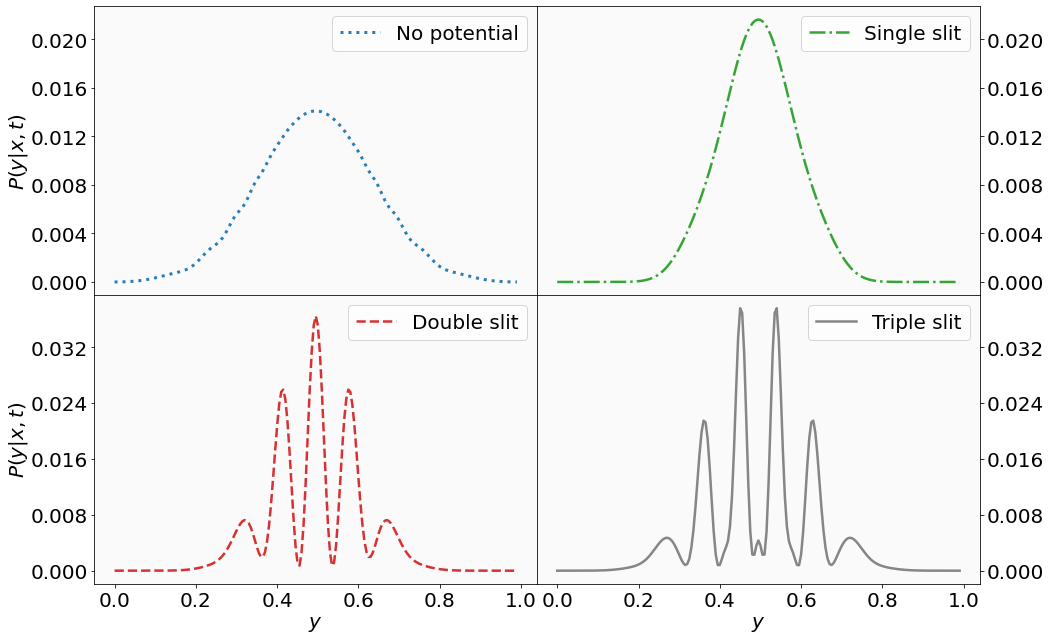

In [16]:
import matplotlib.gridspec as gridspec

h   = 0.005
x = [h*i for i in range(len(u_t_single_prob[:,x075]))]

fig = plt.figure(figsize = (15,9.3))
gs1 = gridspec.GridSpec(2, 2, hspace=0)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

#axs = plt.subplots(gs1[0],gs1[1], sharey=False)

ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1], sharey=ax1)
ax3 = plt.subplot(gs1[2])
ax4 = plt.subplot(gs1[3], sharey=ax3)

linewidth = 2.5
ax = ax4
ax.plot(x, normalize(u_t_triple_prob[:,x075]), 
        color='grey', 
        alpha=0.95, 
        linestyle='solid', 
        label ='Triple slit',
        linewidth =linewidth)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.get_yaxis().set_major_locator(MaxNLocator(nbins = 6, prune='upper'))
ax.set_xlabel(r'$y$') 

ax = ax3
ax.plot(x, normalize(u_t_double_prob[:,x075]), 
        color='tab:red', 
        alpha=0.95, 
        linestyle='dashed', 
        label ='Double slit',
        linewidth =linewidth)
ax.set_xlabel(r'$y$')                                
ax.set_ylabel(r'$P(y|x,t)\:$', rotation=90, labelpad=0)

ax = ax2
ax.plot(x, normalize(u_t_single_prob[:,x075]), 
        color='tab:green', 
        alpha=0.95, 
        linestyle='dashdot', 
        label ='Single slit',
        linewidth =linewidth)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.get_yaxis().set_major_locator(MaxNLocator(nbins = 6, prune='upper'))

ax = ax1
ax.plot(x, normalize(u_t_noV_prob[:,x075]), 
        color='tab:blue', 
        alpha=0.95, 
        linestyle='dotted', 
        label ='No potential',
        linewidth =linewidth*1.2)                         
ax.set_ylabel(r'$P(y|x,t)\:$', rotation=90, labelpad=0)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_facecolor((0.98, 0.98, 0.98))
    ax.legend()

#ax.set_xlim(0,0.008)
#ax.set_ylim(1.85e-23,3.6e-23)


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)



#ax.legend(loc=(0.1,0.6))

plt.tight_layout()
plt.savefig('p9_detector.pdf')
fig.show()

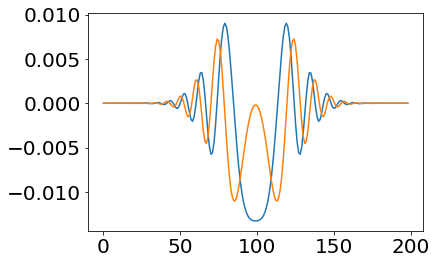

In [17]:
plt.plot(u_t_single_real[:,x08])
plt.plot(u_t_single_imag[:,x08])


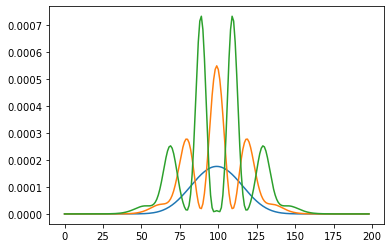

In [248]:
plt.plot(u_t_single_prob[:,x08])
plt.plot(u_t_double_prob[:,x08])
plt.plot(u_t_triple_prob[:,x08])

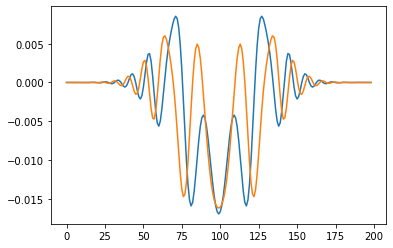

In [236]:
plt.plot(u_t_double_real[:,x08])
plt.plot(u_t_double_imag[:,x08])

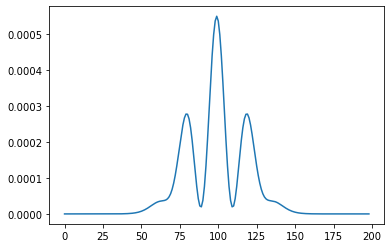

In [237]:
plt.plot(u_t_double_prob[:,x08])

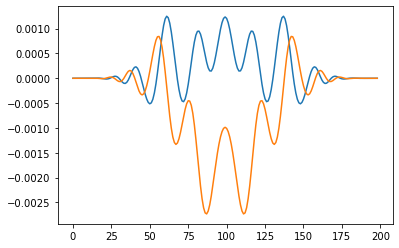

In [238]:
plt.plot(u_t_triple_real[:,x09])
plt.plot(u_t_triple_imag[:,x09])

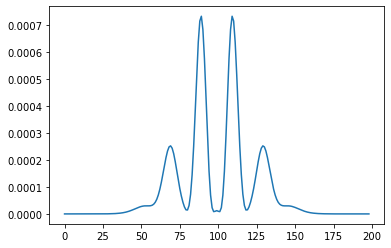

In [239]:
plt.plot(u_t_triple_prob[:,x08])